# Adesso adaptado no Colab

## Vídeos antigos
* [Adesso1-mm-1-7 (86min)](https://www.loom.com/share/92fbb710f02646c59d45c4e8fcfbc469) após 23min

In [1]:
import matplotlib.pyplot as plt
from PIL import Image
import cv2, requests, sys
import numpy as np

In [2]:
# download _morph.py from drive
!pip install -U --no-cache-dir gdown --pre
!gdown --id 1FlMtAkb0npwmD54aCysLsxB84PehcKMe

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Attempting uninstall: gdown
    Found existing installation: gdown 4.6.6
    Uninstalling gdown-4.6.6:
      Successfully uninstalled gdown-4.6.6
/usr/local/lib/python3.9/dist-packages/gdown/cli.py:126: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From (uriginal): https://drive.google.com/uc?id=1FlMtAkb0npwmD54aCysLsxB84PehcKMe
From (redirected): https://drive.google.com/uc?id=1FlMtAkb0npwmD54aCysLsxB84PehcKMe&confirm=t&uuid=4374d874-33ae-44b0-bc86-84bf24e99c49
To: /content/_morph.py
100% 39.2k/39.2k [00:00<00:00, 44.5MB/s]


In [3]:
from _morph import *
help(mm.asf)

Help on function asf in module _morph:

asf(f, filter='OC', b=array([[1, 1, 1],
       [1, 1, 1],
       [1, 1, 1]], dtype=uint8), n=1)
    This function will create an alternating sequential filter
    input:
      - f: input image
      - b: structuring fuctions
      - n: number of iterations
      - filter: 'OC', 'CO', 'OCO', 'COC' [Default: 'OC']
    output:
      - y: result of filter
    ATENÇÃO:



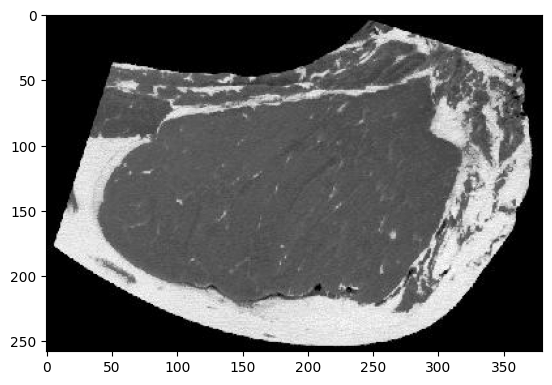

In [4]:
img = mm.read('https://drive.google.com/file/d/1pqFPvnNuhqncBdKLjyJA1JXAgBLhLm5J/view?usp=sharing')
img = cv2.cvtColor(img ,cv2.COLOR_BGR2GRAY) # converte para grayscale
mm.show(img) 

# mmasf

Filtro alternado sequencial [[ref](http://ntur.lib.ntu.edu.tw/bitstream/246246/142445/1/34.pdf)]

$$asf_{CO,b}^n (f) = ([([(f \bullet b) \circ b] \bullet 2b) \circ 2b]  \cdots \circ nb)$$

$$asf_{OC,b}^n (f) = ([([(f \circ b) \bullet b] \circ 2b) \bullet 2b]  \cdots \bullet nb)$$

$$asf_{COC,b}^n (f) = ([(([((f \bullet b) \circ b) \bullet b] \bullet 2b) \circ 2b) \bullet 2b] \cdots \circ nb)$$

$$asf_{OCO,b}^n (f) = ([(([((f \circ b) \bullet b) \circ b] \circ 2b) \bullet 2b) \circ 2b] \cdots \bullet nb)$$


Com $n\geq1$.

**Observação:**  A vizinhança $b$ tem dimensões ímpares e a origem é o centro. Utilizar ```cv2.*```.

In [14]:
f = mm.randomImage(9, 20)
print(mm.drawImage(f))

1 2 8 6 5 7 4 4 6 3 3 2 2 7 6 4 7 6 3 5 
3 0 5 5 3 0 6 4 4 7 1 8 6 3 4 8 5 1 3 0 
8 6 0 1 0 1 1 8 4 7 4 4 7 5 7 5 6 1 3 1 
2 8 5 1 1 4 7 0 0 6 6 0 3 6 1 6 7 6 5 1 
7 1 4 3 7 5 9 8 0 5 6 7 6 5 0 5 3 5 3 9 
8 5 4 7 0 3 5 1 7 5 6 0 8 6 5 8 4 5 1 3 
5 8 3 5 8 7 9 2 6 2 7 7 3 9 7 5 3 7 0 5 
1 0 3 4 6 1 0 3 1 0 8 3 2 4 8 8 5 2 4 6 
6 3 1 9 2 8 4 9 8 5 9 3 8 4 7 3 1 2 9 1 



In [16]:
import numpy as np
b = mm.randomImage(3,3,1)
print(mm.drawImage(b))

1 0 0 
0 1 1 
0 1 1 



In [17]:
b[1,1]=1
b

array([[1, 0, 0],
       [0, 1, 1],
       [0, 1, 1]], dtype=uint8)

In [18]:
print(mm.drawImage(mm.asf(f,'OC',b,1)))

1 1 5 3 3 4 4 4 4 3 3 3 4 5 5 4 1 1 1 1 
1 1 1 1 3 1 1 4 4 3 3 3 3 4 4 5 3 1 1 1 
3 2 1 1 3 1 1 4 4 4 3 3 3 4 4 4 4 3 3 1 
3 3 3 3 1 2 2 1 3 4 4 4 3 3 3 3 3 3 3 3 
4 4 3 3 3 2 2 2 3 3 3 4 5 5 3 3 3 3 3 3 
5 4 4 3 3 3 2 2 2 3 3 4 5 5 5 3 3 3 3 3 
2 2 4 4 4 3 3 3 2 3 3 3 3 4 5 3 2 2 1 1 
2 2 2 4 4 3 3 3 3 3 3 3 3 3 3 4 2 2 1 1 
3 2 2 4 4 4 3 3 3 3 3 3 3 3 3 4 3 2 1 1 



In [19]:
print(mm.drawImage(mm.asf(f,'OC',b,5)))

2 2 2 2 2 2 2 2 2 2 3 3 3 3 3 3 3 3 3 3 
2 2 2 2 2 2 2 2 2 2 3 3 3 3 3 3 3 3 3 3 
2 2 2 2 2 2 2 2 2 2 2 3 3 3 3 3 3 3 3 3 
2 2 2 2 2 2 2 2 2 2 2 3 3 3 3 3 3 3 3 3 
2 2 2 2 2 2 2 2 2 2 2 2 3 3 3 3 3 3 3 3 
2 2 2 2 2 2 2 2 2 2 2 2 3 3 3 3 3 3 3 3 
2 2 2 2 2 2 2 2 2 2 2 2 2 3 3 3 3 3 3 3 
2 2 2 2 2 2 2 2 2 2 2 2 2 3 3 3 3 3 3 3 
2 2 2 2 2 2 2 2 2 2 2 2 2 2 3 3 3 3 3 3 



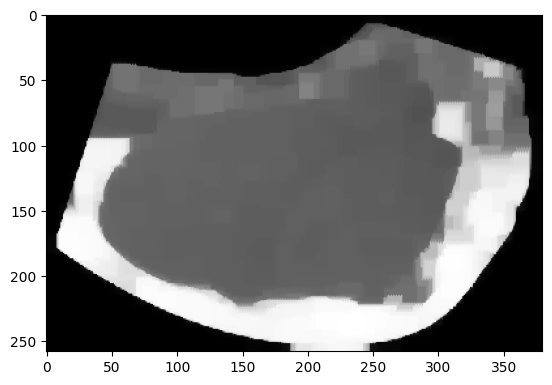

In [10]:
mm.show(mm.asf(img,'COC',b,5)) 